In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

import cv2

path = '/content/drive/MyDrive/OpenCV-Images/flower.JPG'

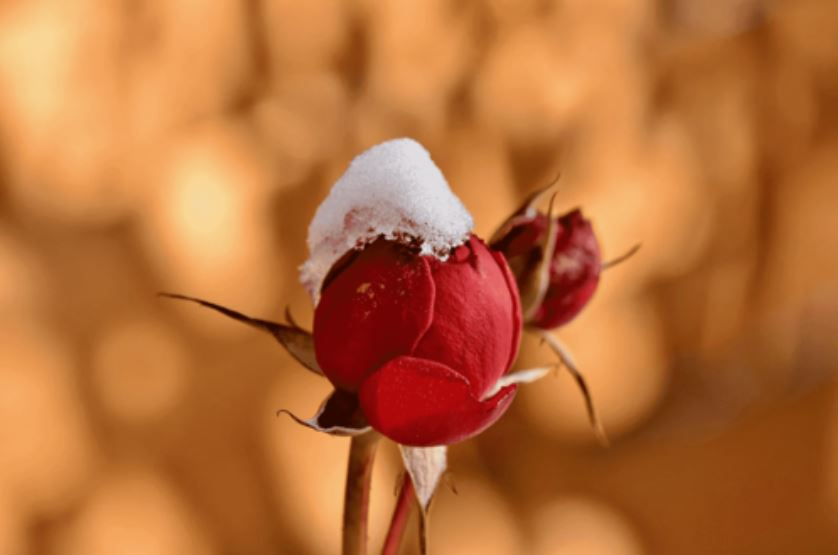

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Prints Dimensions of the image
print(img.shape)

(555, 838, 3)


#### **1) Crop Image**

     # Slicing to crop the image
     cropped_image = img[80:280, 150:330]

     # Display the cropped image
     cv2.imshow("cropped", cropped_image)

     cv2.waitKey(0)
     cv2.destroyAllWindows()

#### **Syntax**
     
     cropped = img[start_row:end_row, start_col:end_col]

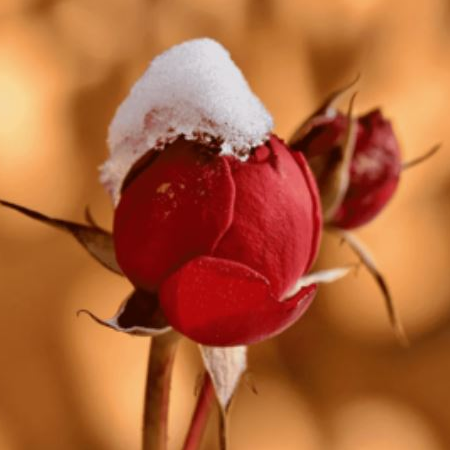

In [ ]:
# Slicing to crop the image
cropped_image = img[100:550, 200:650]

# Display the cropped image
cv2_imshow(cropped_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### **2) Dividing an Image Into Small Patches**

In [ ]:
img =  cv2.imread(path)
image_copy = img.copy()

imgheight=img.shape[0]

imgwidth=img.shape[1]

In [ ]:
M = 76
N = 104
x1 = 0
y1 = 0
 
for y in range(0, imgheight, M):
    for x in range(0, imgwidth, N):
        if (imgheight - y) < M or (imgwidth - x) < N:
            break
             
        y1 = y + M
        x1 = x + N
 
        # check whether the patch width or height exceeds the image width or height
        if x1 >= imgwidth and y1 >= imgheight:
            x1 = imgwidth - 1
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif y1 >= imgheight: # when patch height exceeds the image height
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif x1 >= imgwidth: # when patch width exceeds the image width
            x1 = imgwidth - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        else:
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

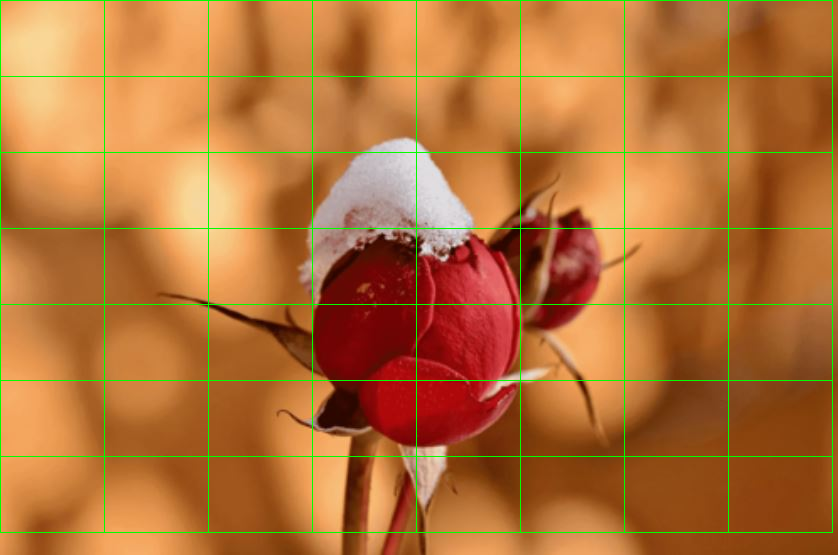

In [ ]:
# Save full image into file directory
cv2_imshow(img)
cv2.imwrite("patched.jpg",img)

cv2.waitKey()
cv2.destroyAllWindows()